<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
#Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
# os.environ["CUDA_VISIBLE_DEVICES"] = ""  # For CPU inference

In [2]:
# Import all necessary libraries.
import numpy as np
import sys
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import copy

# NomeroffNet path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [3]:
from NomeroffNet.YoloV5Detector import Detector

detector = Detector()
detector.load()

Fusing layers... 


In [4]:
from NomeroffNet.BBoxNpPoints import NpPointsCraft, getCvZoneRGB, convertCvZonesRGBtoBGR, reshapePoints

npPointsCraft = NpPointsCraft()
npPointsCraft.load()

Loading weights from checkpoint (/mnt/data/var/www/nomeroff-net/NomeroffNet/Base/mcm/./models/NpPointsCraft/mtl/craft_mlt_25k_2020-02-16.pth)
Loading weights of refiner from checkpoint (/mnt/data/var/www/nomeroff-net/NomeroffNet/Base/mcm/./models/NpPointsCraft/refiner/craft_refiner_CTW1500_2020-02-16.pth )


In [5]:
from NomeroffNet.OptionsDetector import OptionsDetector
from NomeroffNet.TextDetector import TextDetector

optionsDetector = OptionsDetector()
optionsDetector.load("latest")

# Initialize text detector.
textDetector = TextDetector({
    "eu_ua_2004_2015": {
        "for_regions": ["eu_ua_2015", "eu_ua_2004"],
        "model_path": "latest"
    },
    "eu_ua_1995": {
        "for_regions": ["eu_ua_1995"],
        "model_path": "latest"
    },
    "eu": {
        "for_regions": ["eu"],
        "model_path": "latest"
    },
    "ru": {
        "for_regions": ["ru", "eu-ua-fake-lnr", "eu-ua-fake-dnr"],
        "model_path": "latest" 
    },
    "kz": {
        "for_regions": ["kz"],
        "model_path": "latest"
    },
    "ge": {
        "for_regions": ["ge"],
        "model_path": "latest"
    },
    "su": {
        "for_regions": ["su"],
        "model_path": "latest"
    }
})

anpr_ocr_ua_2021_01_15_tensorflow_v2.h5: 19.5MB [00:25, 765kB/s]                             
anpr_ocr_ua-1995_2021_01_12_tensorflow_v2.h5: 19.5MB [00:34, 557kB/s]                             
anpr_ocr_ru_2020_10_12_tensorflow_v2.3.h5: 19.5MB [00:28, 674kB/s]                             
anpr_ocr_kz_2020_08_26_tensorflow_v2.h5: 19.6MB [00:18, 1.08MB/s]                            
anpr_ocr_ge_2020_08_21_tensorflow_v2.h5: 19.6MB [00:29, 659kB/s]                             
anpr_ocr_su_2020_11_27_tensorflow_v2.3.h5: 19.6MB [00:34, 568kB/s]                             


In [6]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

[[[877.1665859772114, 569.7866744918446], [877.1665859772114, 511.54668932546235], [1081.8334268700833, 466.0651611091514], [1081.8334140227885, 524.3051557539665]]]


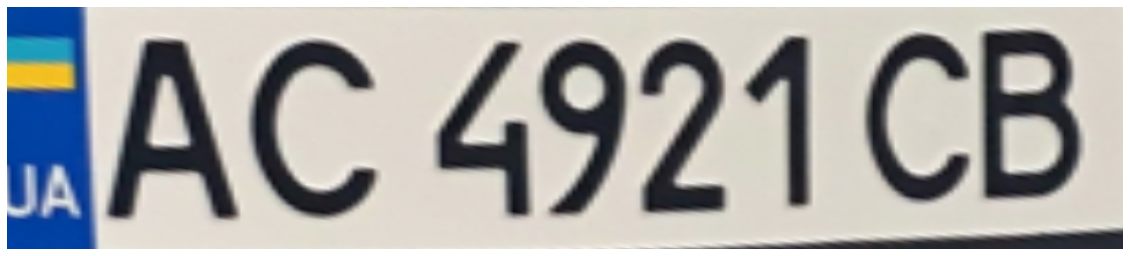

['eu_ua_2015']
[1]
['AC4921CB']


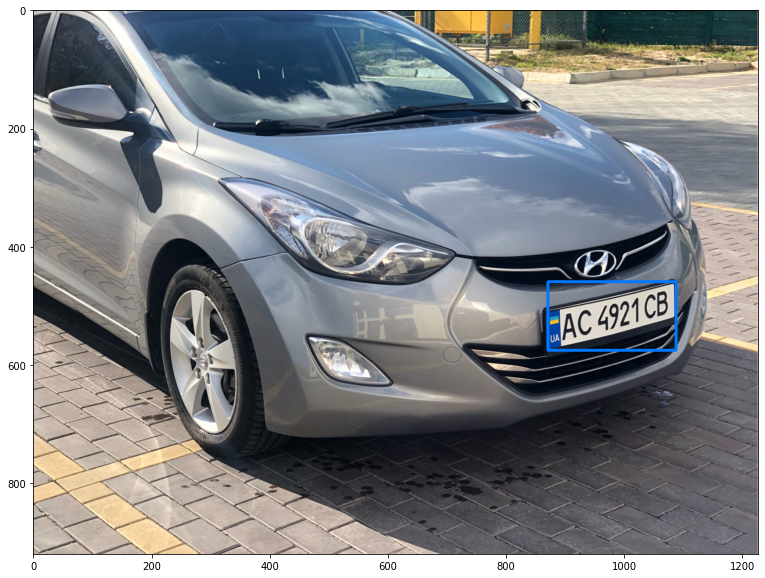

[[[1698.8134414678357, 1051.0751989951164], [1698.813441467836, 996.4869701766005], [1779.7745669672859, 929.8131012778745], [1779.77457396289, 984.4013342995181]]]


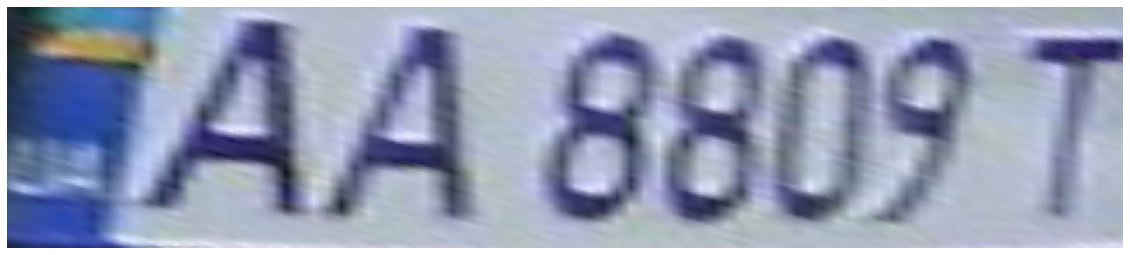

['eu_ua_2015']
[1]
['AA8809T']


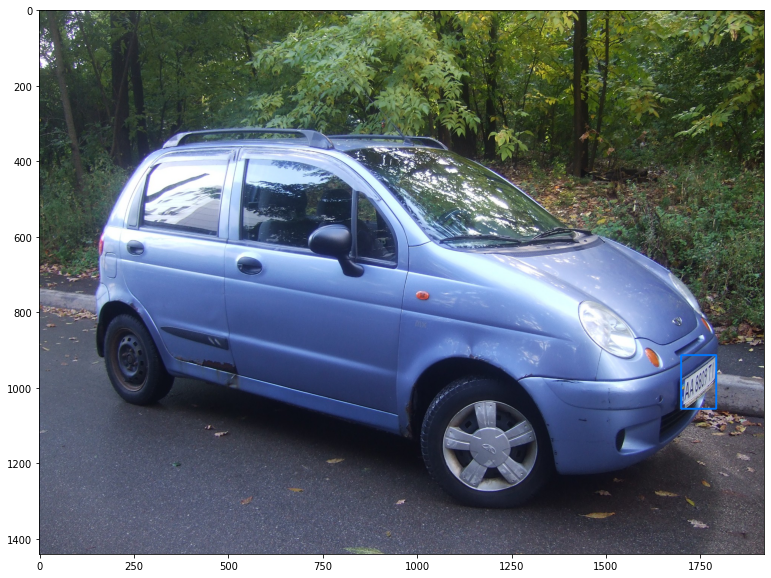

[[[845.7999983990193, 400.9200007534027], [845.7999992859363, 381.0799957156181], [945.6666641235352, 381.0799913787842], [945.6666641235352, 400.91999667167664]], [[435.0, 402.07999725963765], [435.0, 380.5866625926807], [525.6666641235352, 380.5866583633423], [525.6666641235352, 402.07999444007874]]]


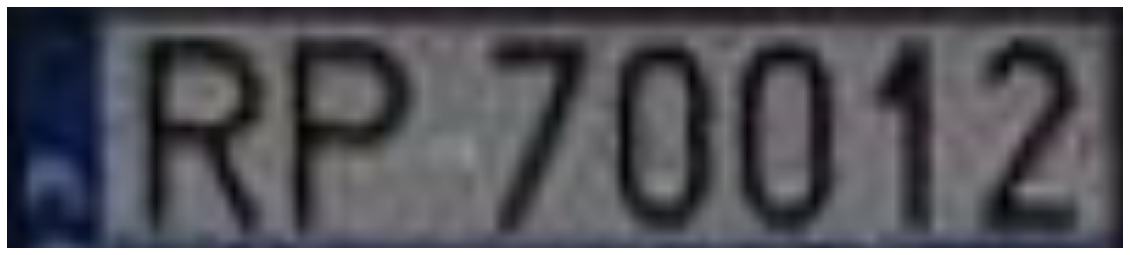

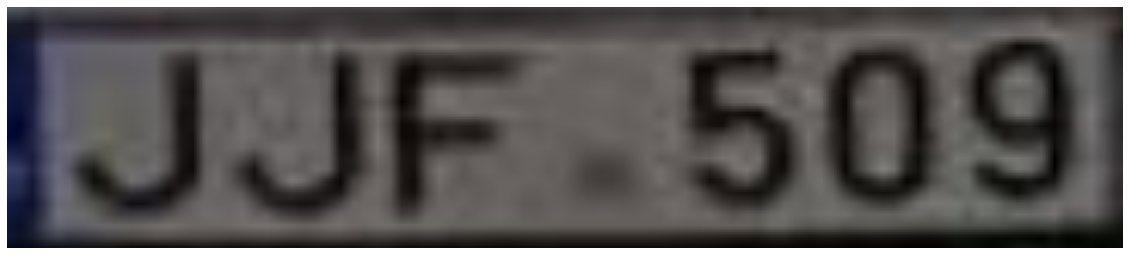

['eu', 'ge']
[1, 1]
['RP70012', 'JJF509']


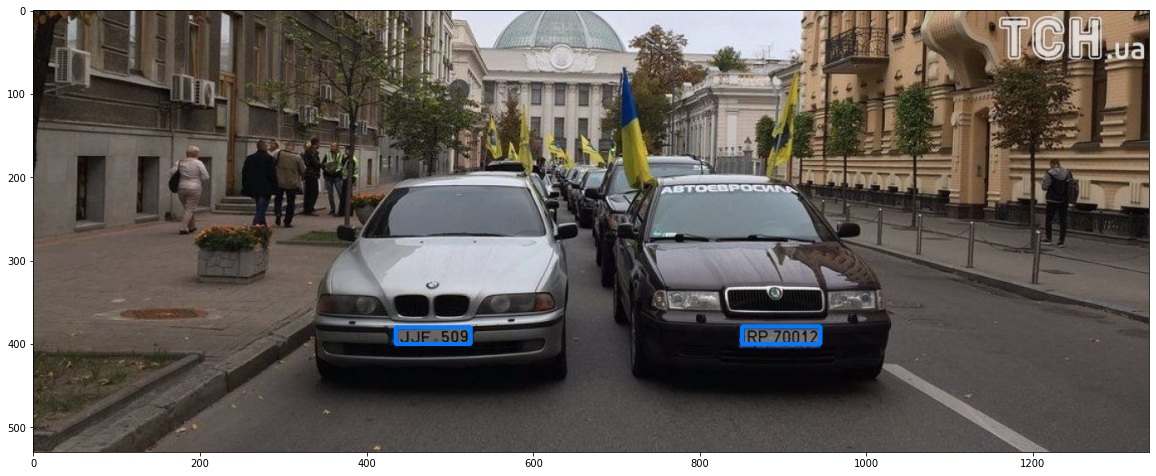

[[[191.0, 451.5733334424276], [191.00000213623048, 409.7599966859816], [277.0, 409.7599928414823], [277.0, 451.5733278504287]]]


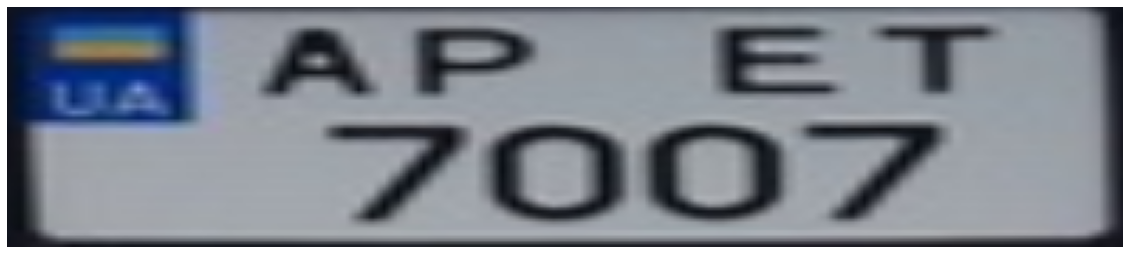

['eu_ua_2015']
[2]
['AE57OT']


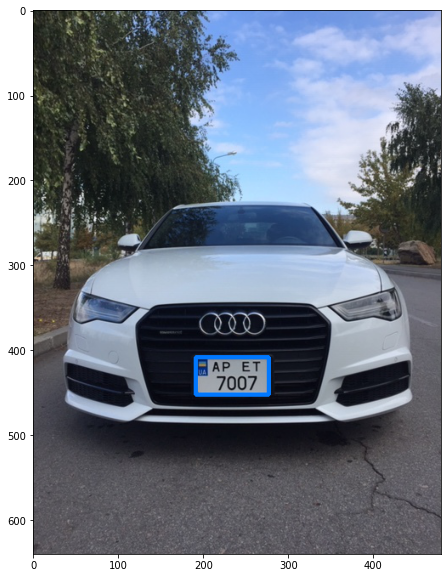

[[[351.133740408136, 711.2713037373809], [351.133740408136, 653.2021957820803], [584.8168886436592, 662.7402859747176], [584.8168827289244, 720.8093933866207]]]


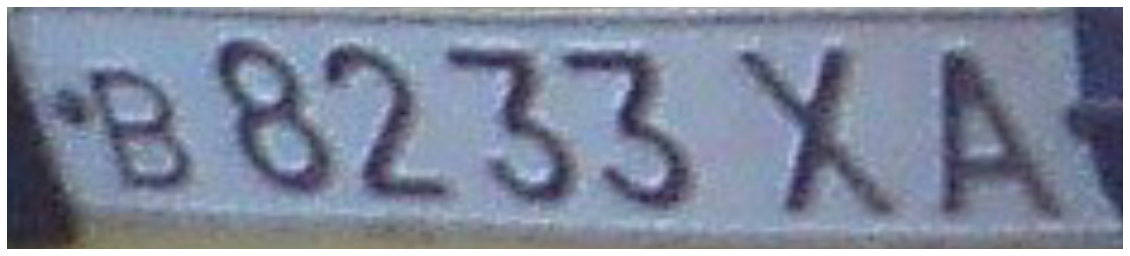

['su']
[1]
['В8233ХА']


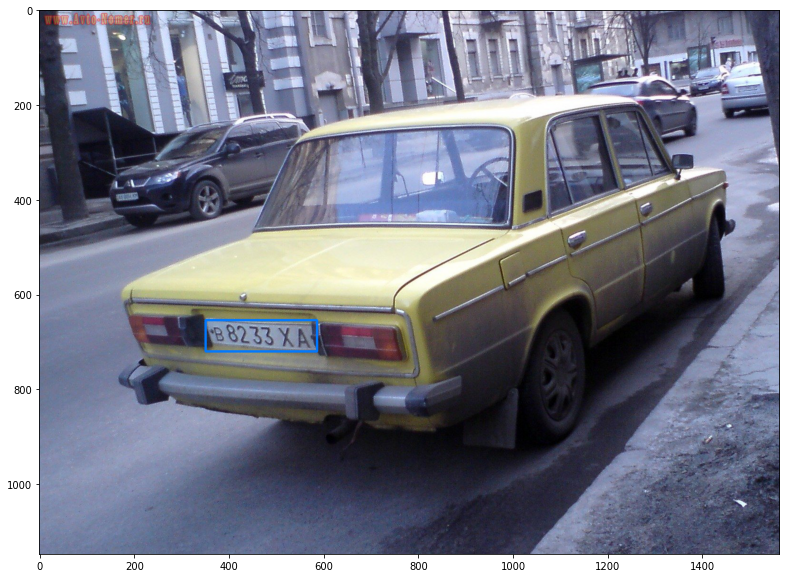

[[[284.55356546239227, 697.9685050884741], [284.5535654623923, 610.5382239888748], [407.60816787413773, 625.0152227116804], [407.60816357108104, 712.4454976626516]]]


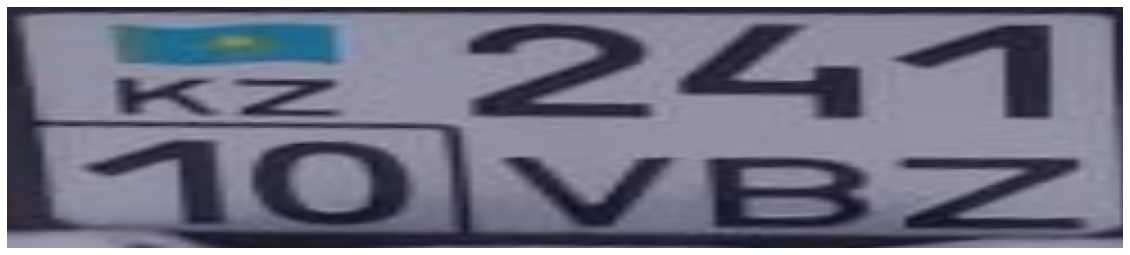

['kz']
[2]
['24110VB']


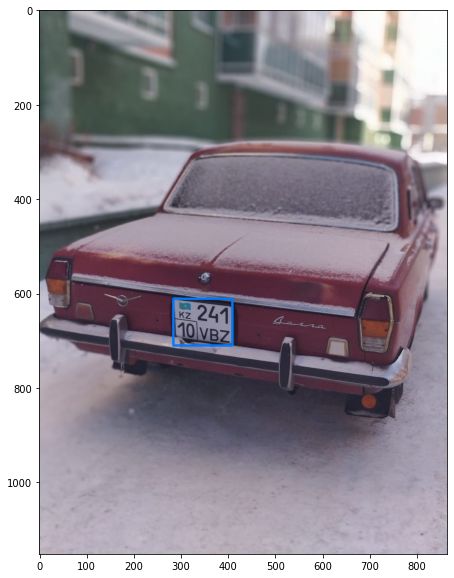

[[[166.3312341966934, 448.5970089497092], [166.3312341966934, 388.485363675621], [305.24459518629385, 457.01595256648704], [305.2446016146614, 517.127602073152]]]


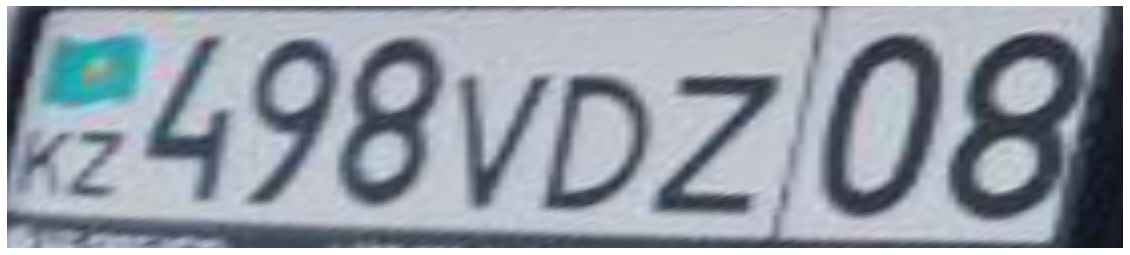

['kz']
[1]
['498VDZ08']


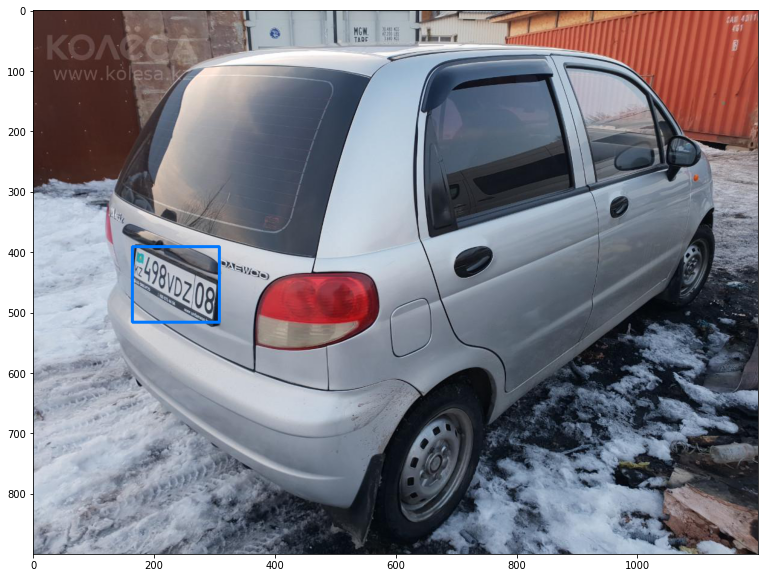

[[[643.0, 495.9476628439172], [643.5066780095713, 462.00020013467883], [800.0, 464.3359214510661], [799.4933361821397, 498.28338290825866]]]


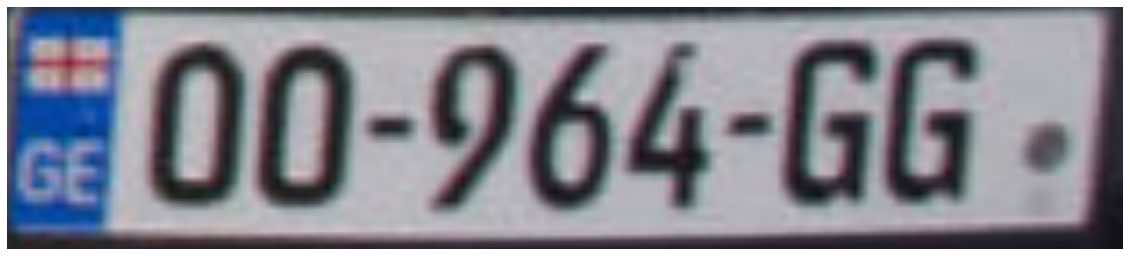

['ge']
[1]
['00964GG']


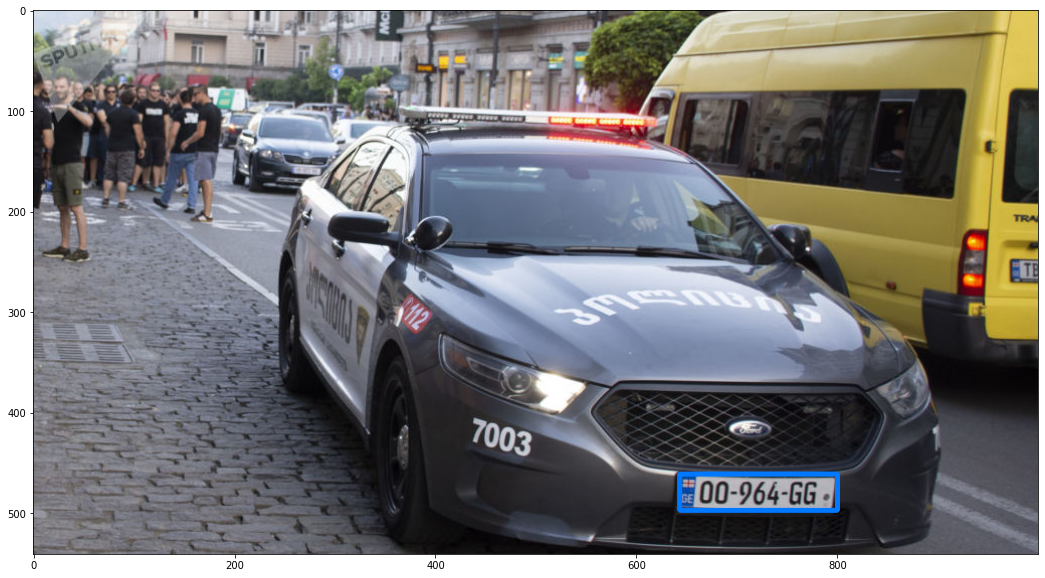

In [7]:
rootDir = 'images/*'

imgs = [mpimg.imread(img_path) for img_path in glob.glob(rootDir)]

for img in imgs:
    targetBoxes = detector.detect_bbox(copy.deepcopy(img))
    targetBoxes = targetBoxes

    all_points = npPointsCraft.detect(img, targetBoxes)
    all_points = [ps for ps in all_points if len(ps)]
    print(all_points)

     # cut zones
    toShowZones = [getCvZoneRGB(img, reshapePoints(rect, 1)) for rect in all_points]
    zones = convertCvZonesRGBtoBGR(toShowZones)
    for zone, points in zip(toShowZones, all_points):
        plt.axis("off")
        plt.imshow(zone)
        plt.show()

    # find standart
    regionIds, stateIds, countLines = optionsDetector.predict(zones)
    regionNames = optionsDetector.getRegionLabels(regionIds)
    print(regionNames)
    print(countLines)

    # find text with postprocessing by standart  
    textArr = textDetector.predict(zones, regionNames, countLines)
    print(textArr)
    
    # draw rect and 4 points
    for targetBox, points in zip(targetBoxes, all_points):
        cv2.rectangle(img, 
                      (int(targetBox[0]), int(targetBox[1])), 
                      (int(targetBox[2]), int(targetBox[3])), 
                      (0,120,255), 
                      3)
    plt.imshow(img)
    plt.show()